In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [7]:
%ls

Medicalpremium.csv


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Medicalpremium.csv')
print(df)

     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

In [10]:
df.describe()



,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [11]:
df.isnull().sum()


Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<Axes: >

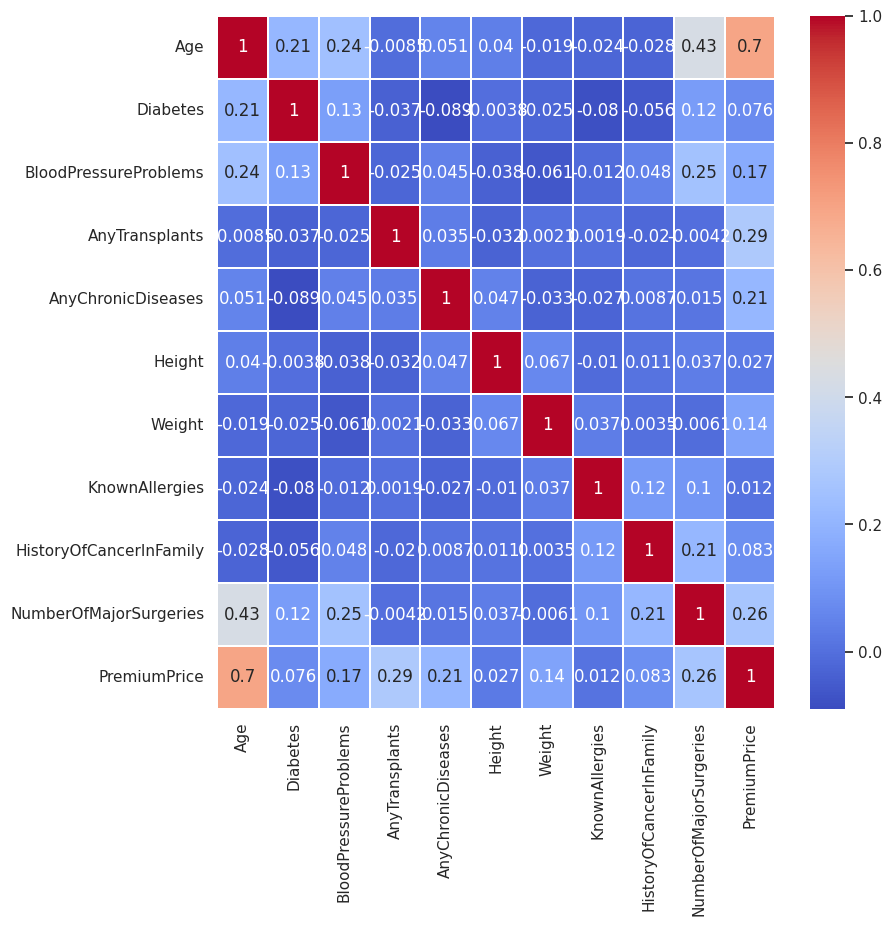

In [13]:
plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True,linewidths=0.1)

In [14]:
Categorical_Variables=['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

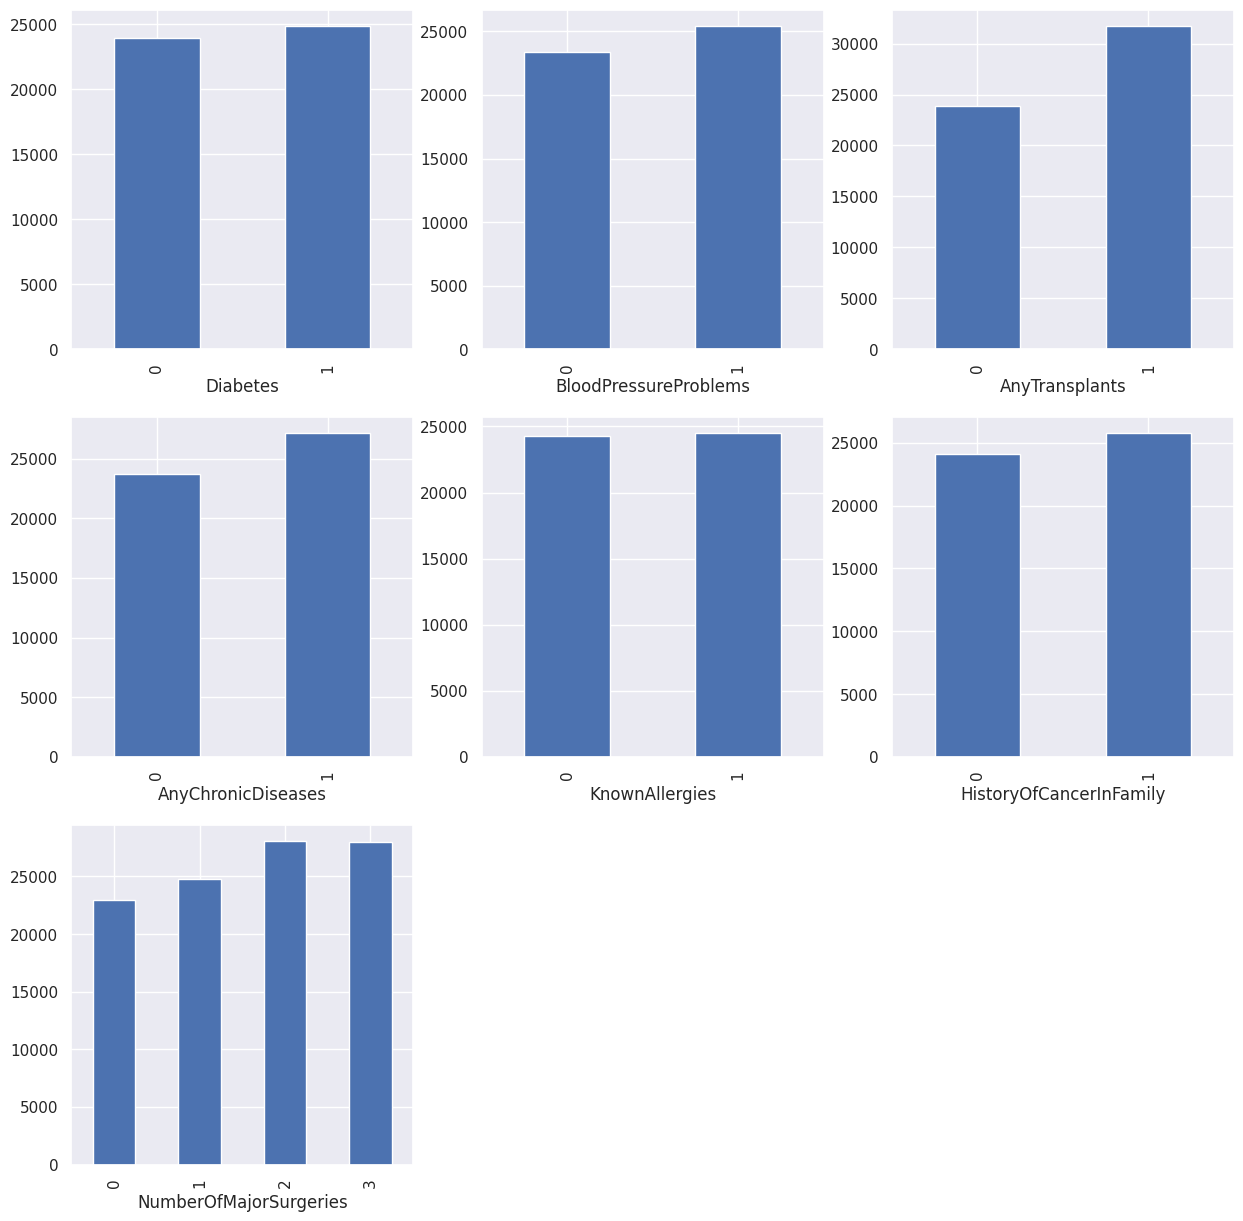

In [15]:
plt.figure(figsize=(15,15))
a=3
b=3
c=1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    df.groupby(feature)['PremiumPrice'].mean().plot.bar()
    c=c+1

plt.show()

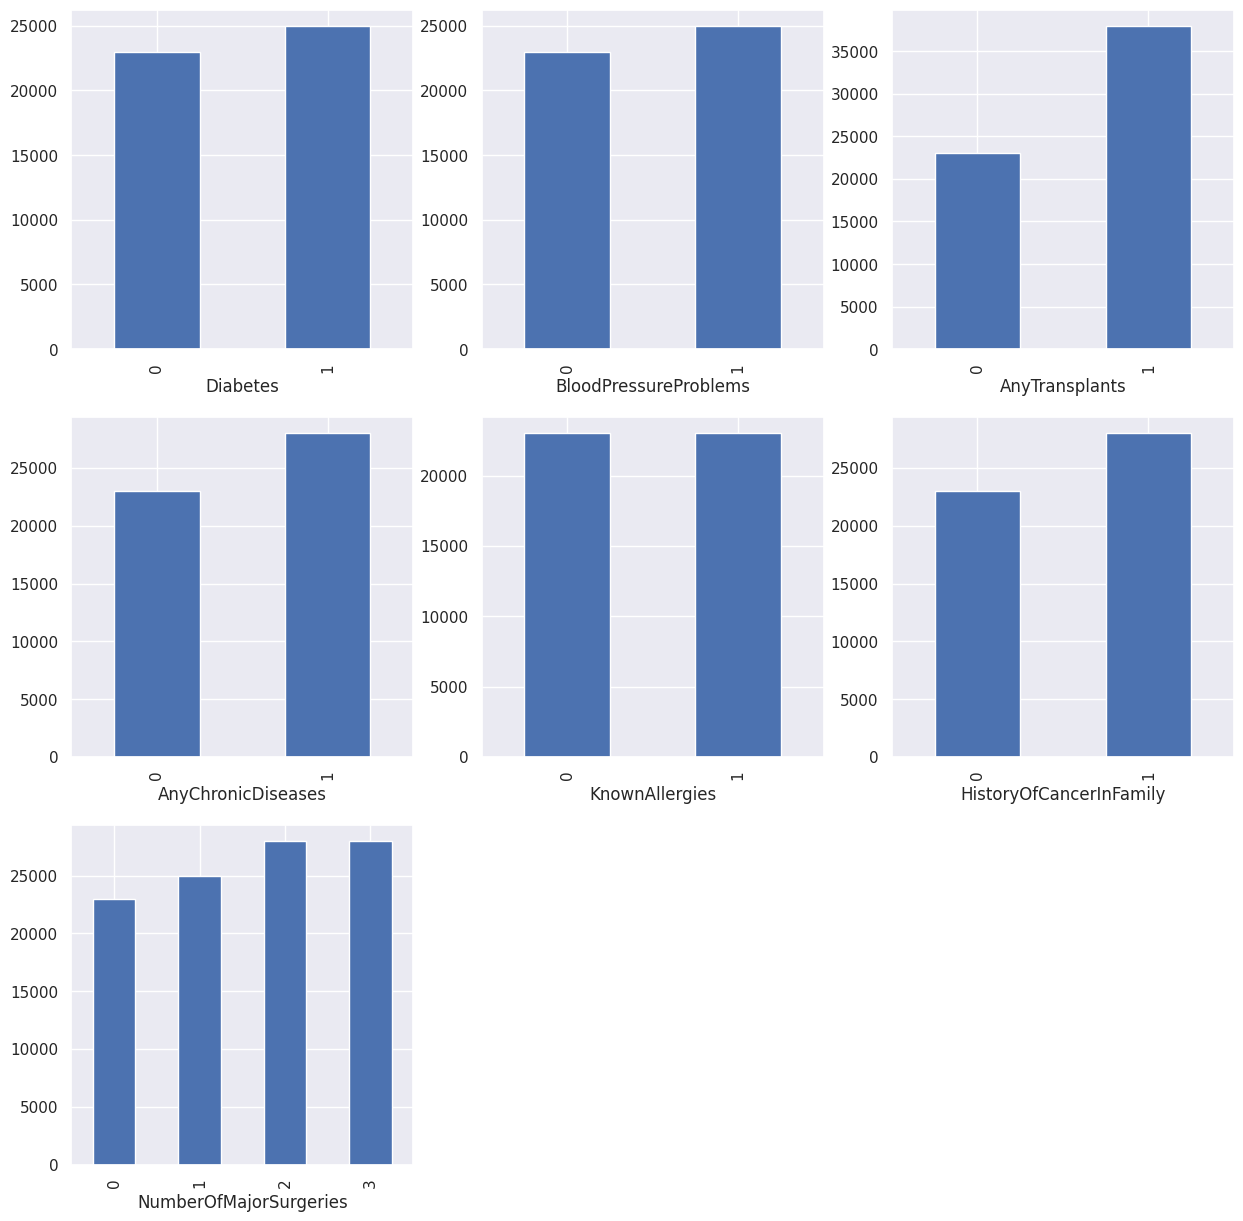

In [16]:
plt.figure(figsize=(15,15))
a=3
b=3
c=1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    df.groupby(feature)['PremiumPrice'].median().plot.bar()
    c=c+1

plt.show()

In [17]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)
df['AgeLabel']=pr_bins=pd.cut(df['Age'],bins=5,labels=pr_lab,precision=0)
df['WeightLabel']=pr_bins=pd.cut(df['Weight'],bins=5,labels=pr_lab,precision=0)
df['HeightLabel']=pr_bins=pd.cut(df['Height'],bins=5,labels=pr_lab,precision=0)

In [18]:
df.head()



,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average


<Axes: xlabel='PremiumLabel', ylabel='count'>

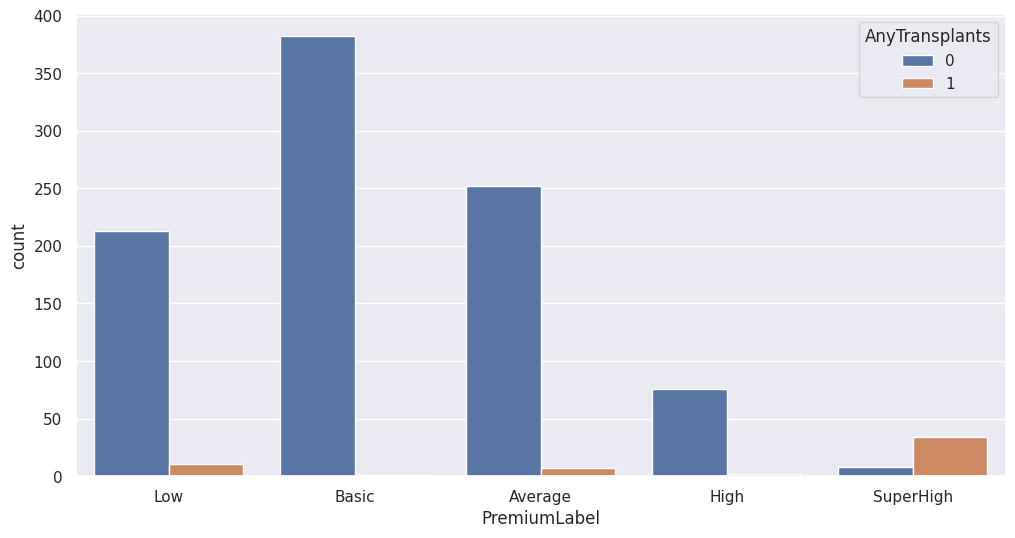

In [19]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AnyTransplants', data=df,ax=ax)

<Axes: xlabel='PremiumLabel', ylabel='count'>

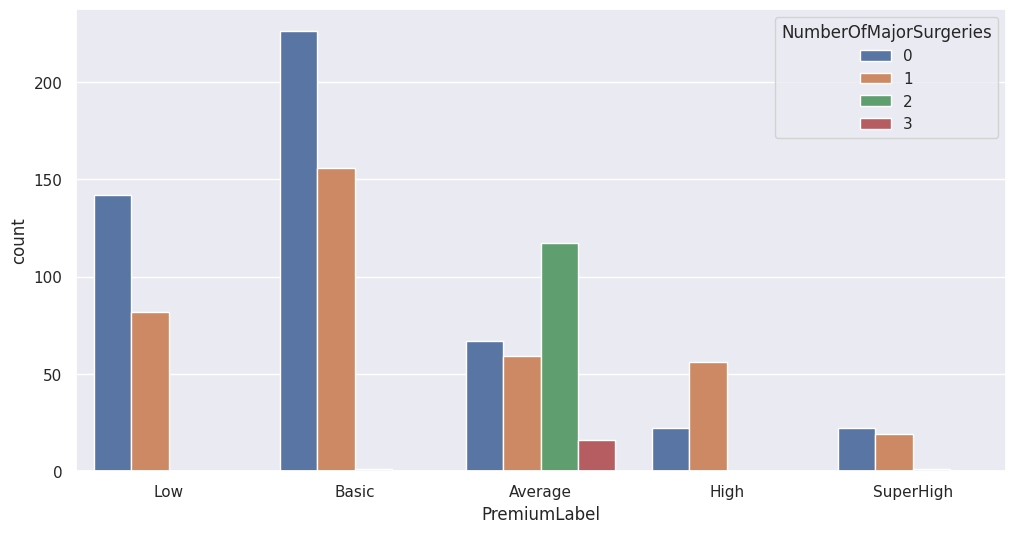

In [20]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='NumberOfMajorSurgeries', data=df,ax=ax)

<Axes: xlabel='PremiumLabel', ylabel='count'>

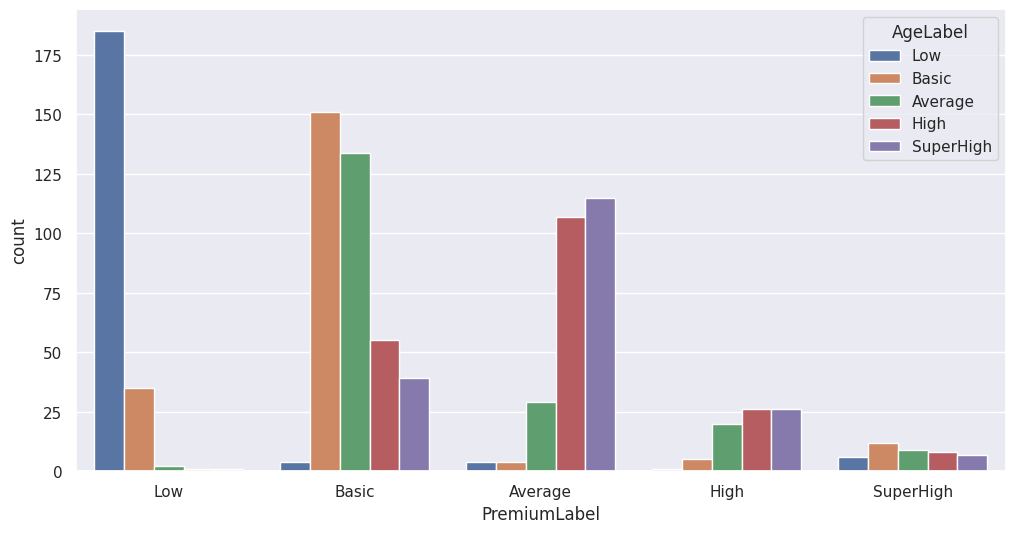

In [21]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AgeLabel',data=df,ax=ax)

<Axes: xlabel='WeightLabel', ylabel='count'>

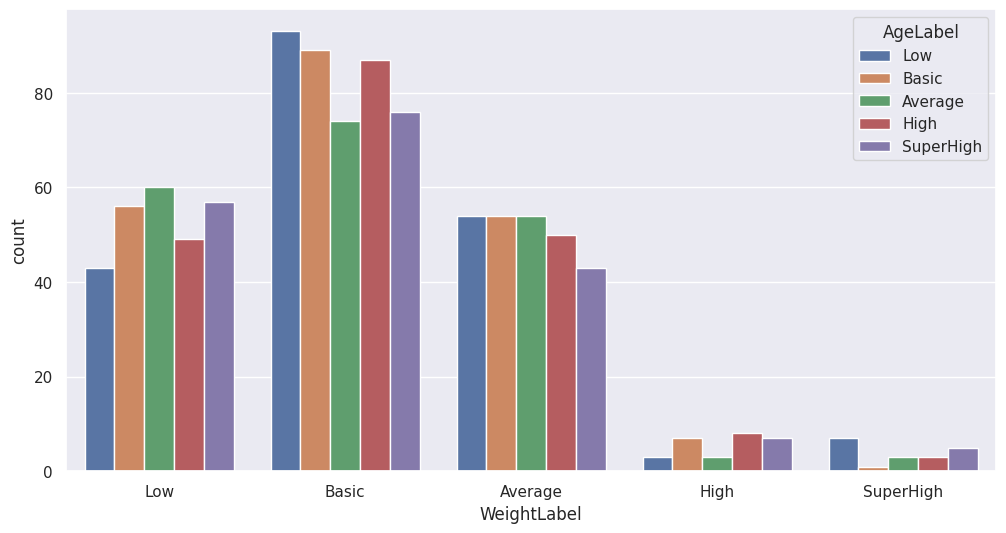

In [22]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='WeightLabel',hue='AgeLabel',data=df,ax=ax)

In [24]:
df['BMI'] = df.Weight.values/(((df.Height).values/100)**2)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average,31.934969


In [25]:
under_index = df[df.BMI<18.4999].index
normal_index = df[(df.BMI>18.5) & (df.BMI<24.9999)].index
over_index = df[(df.BMI>25) & (df.BMI<29.9999)].index
obecity_index = df[df.BMI>30].index

df.loc[under_index,'BMI_Status'] = 'Under Weight'
df.loc[normal_index,'BMI_Status'] = 'Normal'
df.loc[over_index,'BMI_Status'] = 'Over Weight'
df.loc[obecity_index,'BMI_Status'] = 'Obecity'

In [26]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh,27.770313,Over Weight
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average,31.934969,Obecity


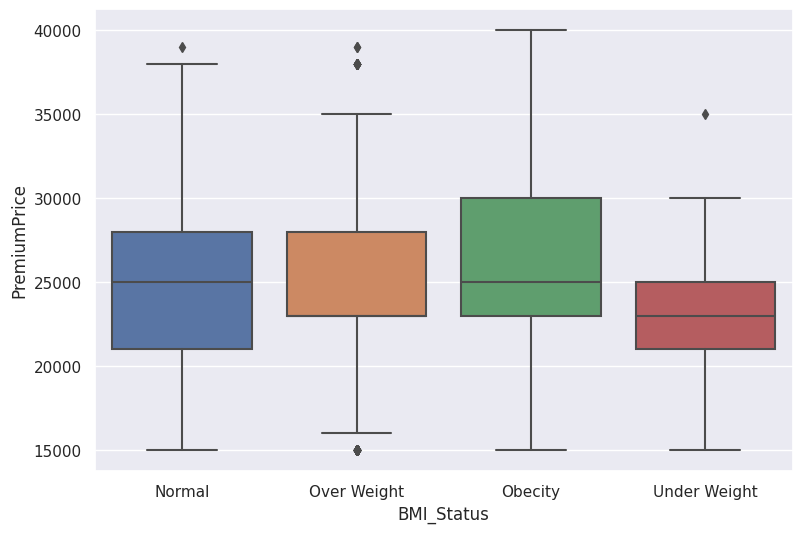

In [27]:
plt.figure(figsize=(9,6))
ax = sns.boxplot(x='BMI_Status', y='PremiumPrice', data=df)

In [28]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh,27.770313,Over Weight
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average,31.934969,Obecity


In [29]:
df=df.drop(['PremiumLabel','AgeLabel','WeightLabel','HeightLabel'],axis=1)

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Over Weight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obecity


In [30]:
df_BMI_Status=pd.get_dummies(df.BMI_Status)
df=pd.concat([df,df_BMI_Status],axis=1)
df=df.drop(['BMI_Status','BMI'],axis=1)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Normal,Obecity,Over Weight,Under Weight
0,45,0,0,0,0,155,57,0,0,0,25000,1,0,0,0
1,60,1,0,0,0,180,73,0,0,0,29000,1,0,0,0
2,36,1,1,0,0,158,59,0,0,1,23000,1,0,0,0
3,52,1,1,0,1,183,93,0,0,2,28000,0,0,1,0
4,38,0,0,0,1,166,88,0,0,1,23000,0,1,0,0


In [31]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

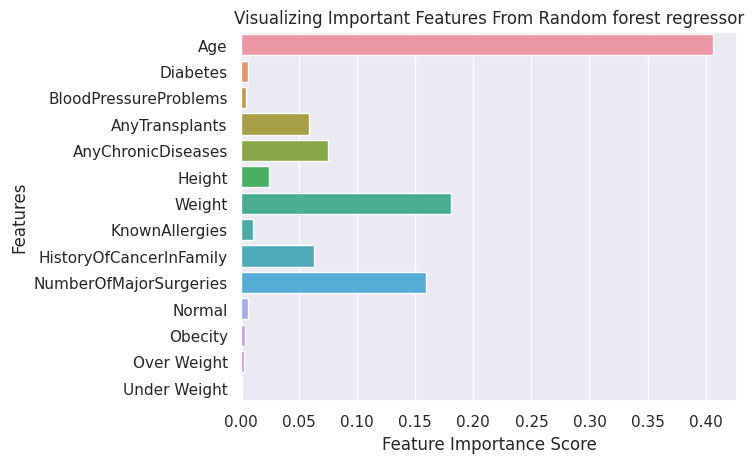

In [34]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
feature_imp1 = clf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest regressor")
plt.show();

In [35]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8737373737373737


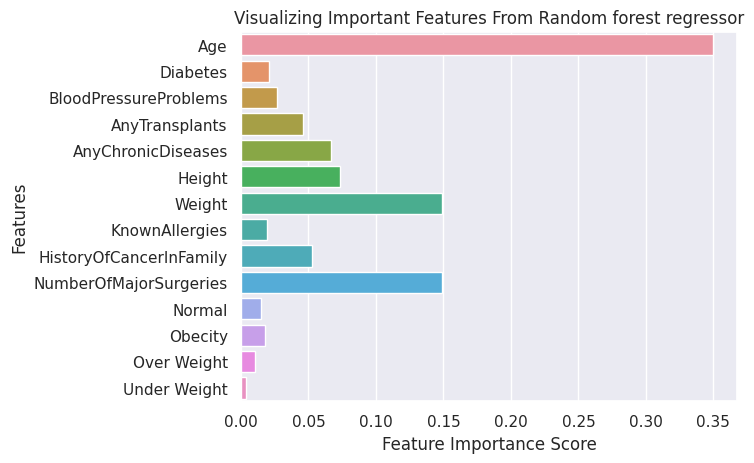

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=37,criterion='entropy')
classifier.fit(x_train,y_train)
feature_imp1 = classifier.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest regressor")
plt.show();

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred= classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9090909090909091

In [48]:
feature_names = ['Age', 'Height', 'Weight', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries','Normal','Obecity','Overweight','Underweight']

input_factors = []

for feature_name in feature_names:
    user_input = float(input(f"Enter value for {feature_name}: "))
    input_factors.append(user_input)

predicted_premium_price = clf.predict([input_factors])

print(f"Predicted Premium Price: {predicted_premium_price[0]}")

Enter value for Age: 45
Enter value for Height: 155
Enter value for Weight: 57
Enter value for Diabetes: 0
Enter value for BloodPressureProblems: 0
Enter value for AnyTransplants: 0
Enter value for AnyChronicDiseases: 0
Enter value for KnownAllergies: 0
Enter value for HistoryOfCancerInFamily: 0
Enter value for NumberOfMajorSurgeries: 0
Enter value for Normal: 1
Enter value for Obecity: 0
Enter value for Overweight: 0
Enter value for Underweight: 0
Predicted Premium Price: 29000
